In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [51]:
df = pd.read_csv(r'C:\Users\Pepinot\Documents\Henry\Modulos\PROYECTO INDIVIDUAL 2\EDA_Provincia\Provincias.csv')

En este apartado vamos a dar comienzo al analisis exploratorio de los datos referentes a las provincias


# Vision general de los datos


In [52]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           504 non-null    int64  
 1   Trimestre                     504 non-null    int64  
 2   Provincia                     504 non-null    object 
 3   ADSL                          504 non-null    float64
 4   Cablemodem                    504 non-null    float64
 5   Fibra óptica                  504 non-null    float64
 6   Wireless                      504 non-null    float64
 7   Otros accesos                 504 non-null    float64
 8   Total accesos                 504 non-null    float64
 9   Mbps (Media de bajada)        504 non-null    float64
 10  Accesos por cada 100 hogares  504 non-null    float64
 11  HASTA 512 kbps                480 non-null    float64
 12  + 512 Kbps - 1 Mbps           480 non-null    float64
 13  + 1 M

In [50]:
#Detección de valores nulos y faltantes

print("Valores nulos por columna:")
print(df.isnull().sum())

print("\nPorcentaje de valores nulos por columna:")
print(df.isnull().sum() / len(df) * 100)

Valores nulos por columna:
Año                              0
Trimestre                        0
Provincia                        0
ADSL                             0
Cablemodem                       0
Fibra óptica                     0
Wireless                         0
Otros accesos                    0
Mbps (Media de bajada)           0
Accesos por cada 100 hogares     0
HASTA 512 kbps                  24
+ 512 Kbps - 1 Mbps             24
+ 1 Mbps - 6 Mbps               24
+ 6 Mbps - 10 Mbps              24
+ 10 Mbps - 20 Mbps             24
+ 20 Mbps - 30 Mbps             24
+ 30 Mbps                       24
Otras velocidades               30
Fecha_combinada                  0
Cable+Fibra                      0
dtype: int64

Porcentaje de valores nulos por columna:
Año                             0.000000
Trimestre                       0.000000
Provincia                       0.000000
ADSL                            0.000000
Cablemodem                      0.000000
Fibra óptica 

No es casual que hayan datos nulos en 24 filas sino que tiene que ver con la falta de información del trimestre 4 de 2023:

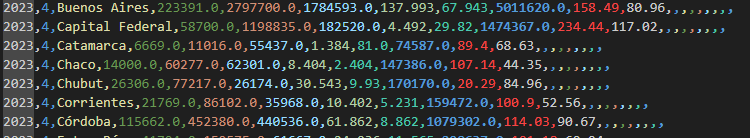

In [51]:
#Detección de duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")


Número de filas duplicadas: 0


In [54]:
#Detección de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columna] < lower_bound) | (df[columna] > upper_bound)]
    return outliers

columnas_numericas = df.select_dtypes(include=[np.number]).columns

for columna in columnas_numericas:
    outliers = detectar_outliers(df, columna)
    print(f"\nOutliers en {columna}:")
    print(outliers[[columna, 'Año', 'Trimestre']])


Outliers en Año:
Empty DataFrame
Columns: [Año, Año, Trimestre]
Index: []

Outliers en Trimestre:
Empty DataFrame
Columns: [Trimestre, Año, Trimestre]
Index: []

Outliers en ADSL:
                 ADSL   Año  Trimestre
Fecha                                 
2019-01-01  1304507.0  2019          1
2019-01-01   328246.0  2019          1
2019-01-01   323272.0  2019          1
2019-01-01   148524.0  2019          1
2019-01-01   340038.0  2019          1
...               ...   ...        ...
2023-01-01   304583.0  2023          1
2023-02-01   265537.0  2023          2
2023-03-01   237705.0  2023          3
2023-04-01   223391.0  2023          4
2024-01-01   203297.0  2024          1

[75 rows x 3 columns]

Outliers en Cablemodem:
            Cablemodem   Año  Trimestre
Fecha                                  
2019-01-01   2020730.0  2019          1
2019-01-01   1030814.0  2019          1
2019-01-01    363959.0  2019          1
2019-01-01    340344.0  2019          1
2019-02-01   2079900.0  

-----------------------------------------------------------------------------------------
# Análisis temporal
-----------------------------------------------------------------------------------------
*Gráfico de lineas:* 

La evolución del **total de accesos a Internet en Argentina** durante los años 2019 a 2024, dividios por trimestres.

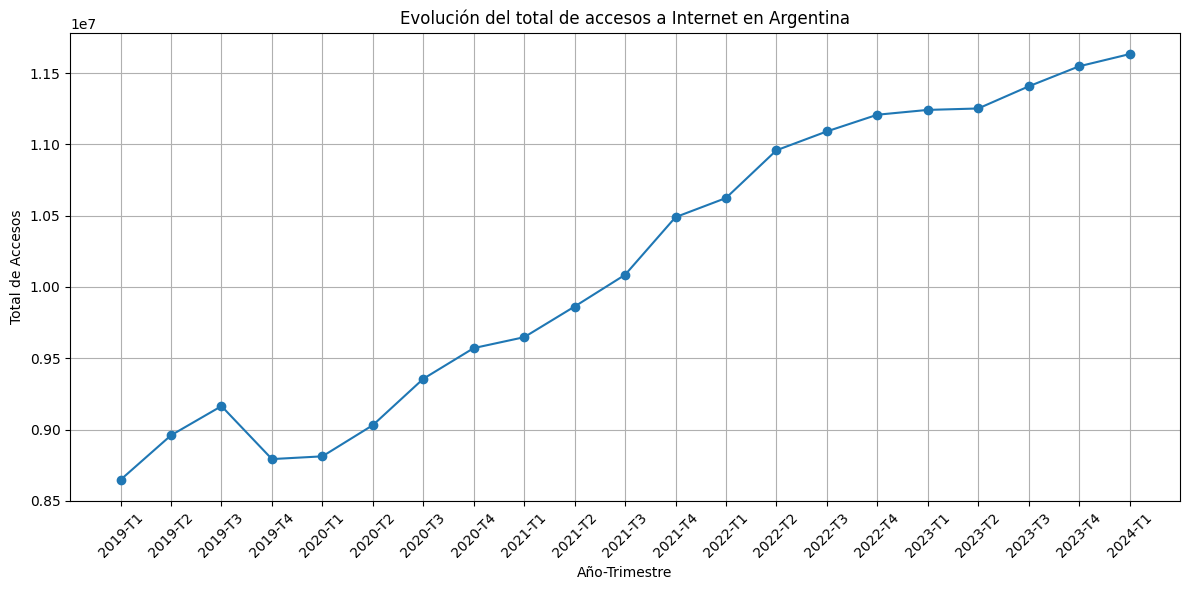

In [53]:
plt.figure(figsize=(12, 6))
df_grouped = df.groupby(['Año', 'Trimestre'])['Total accesos'].sum().reset_index()
df_grouped['Periodo'] = df_grouped['Año'].astype(str) + '-T' + df_grouped['Trimestre'].astype(str)

plt.plot(df_grouped['Periodo'], df_grouped['Total accesos'], marker='o')
plt.title('Evolución del total de accesos a Internet en Argentina')
plt.xlabel('Año-Trimestre')
plt.ylabel('Total de Accesos')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Podemos observar claramente que a partir del año 2020 hubo un despegue de la cantidad de accessos a internet en las provincias. Podemos atribuir este proceso a la pandemia que tuvo lugar ese año, siendo la causa principal de la maximizacion de los accesos en cada provincia.

-----------------------------------------------------------------------------------------
*Gráfico de lineas:*

**Cambios en la velocidad media de bajada por año (Mbps)**

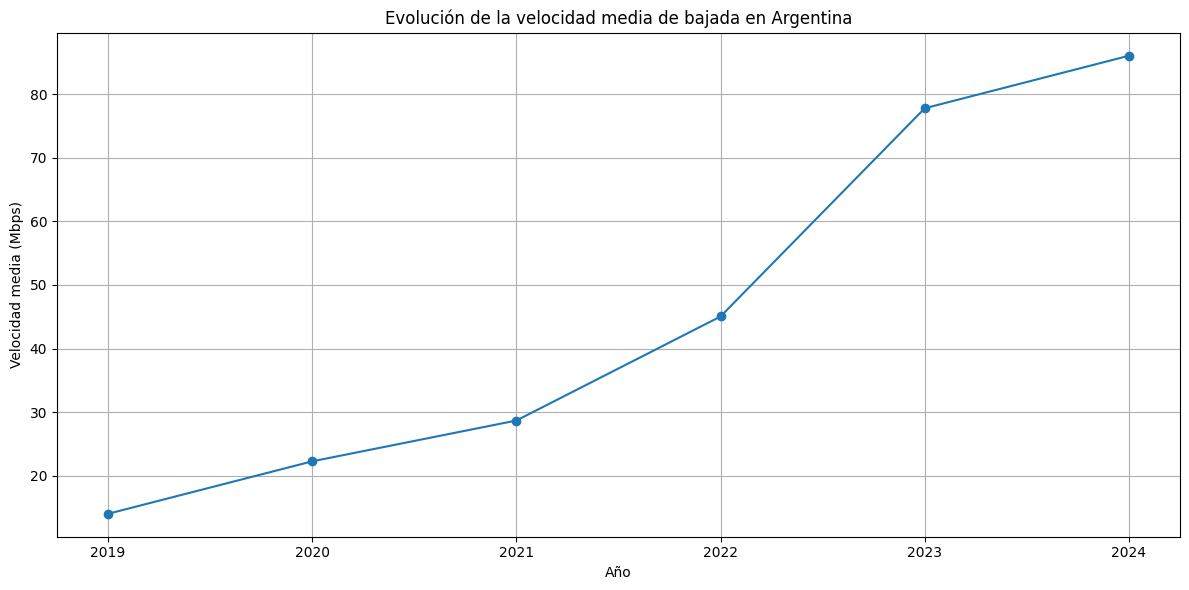

In [54]:
plt.figure(figsize=(12, 6))
df.groupby('Año')['Mbps (Media de bajada)'].mean().plot(kind='line', marker='o')
plt.title('Evolución de la velocidad media de bajada en Argentina')
plt.xlabel('Año')
plt.ylabel('Velocidad media (Mbps)')
plt.grid(True)
plt.tight_layout()
plt.show()

Recordemos que cuando se habla de la **media de bajada en Mbps**, se refiere a la velocidad promedio de descarga de datos desde internet hacia tu dispositivo durante un período de tiempo determinado. Esta es la velocidad con la que puedes bajar archivos, cargar páginas web, ver videos en streaming, etc.

Los ultimos años ha ido creciendo la bajada de Mbps debido a las actualizaciones de los dispositivos que requieren cada vez de más megabits por segundo para funcionar. La velocidad es crucial para trabajar con teconologia. 

Relacionado con el grafico anterior y haciendo nuevamente mencion de la pandemia, a partir del 2020 se ha incrementado el uso de videollamadas y acceso a videos. Es notable que se requiera de cada vez más velocidad en las conexiones.


-----------------------------------------------------------------------------------------
*Gráfico de área apilada:*

**Tendencias en los tipos de conexión a lo largo del tiempo.**

Presenta la distribución porcentual de los diferentes tipos de conexion (ADSL, Cablemodem, Fibra óptica, Wireless, Otros) y cómo han cambiado en el tiempo.

In [55]:
#Definimos los tipos de conexion y colores

tipos_conexion = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros accesos']

colores = {'ADSL': '#FF9999', 'Cablemodem': '#66B2FF', 'Fibra óptica': '#99FF99', 
           'Wireless': '#FFCC99', 'Otros accesos': '#FF99FF'}

In [56]:
#Calcular el total de accesos por año

df_anual = df.groupby('Año')[tipos_conexion + ['Total accesos']].sum().reset_index()

In [57]:
#Calcular el porcentaje de cada tipo de conexión por año

for tipo in tipos_conexion:
    df_anual[f'{tipo}_porcentaje'] = df_anual[tipo] / df_anual['Total accesos'] * 100


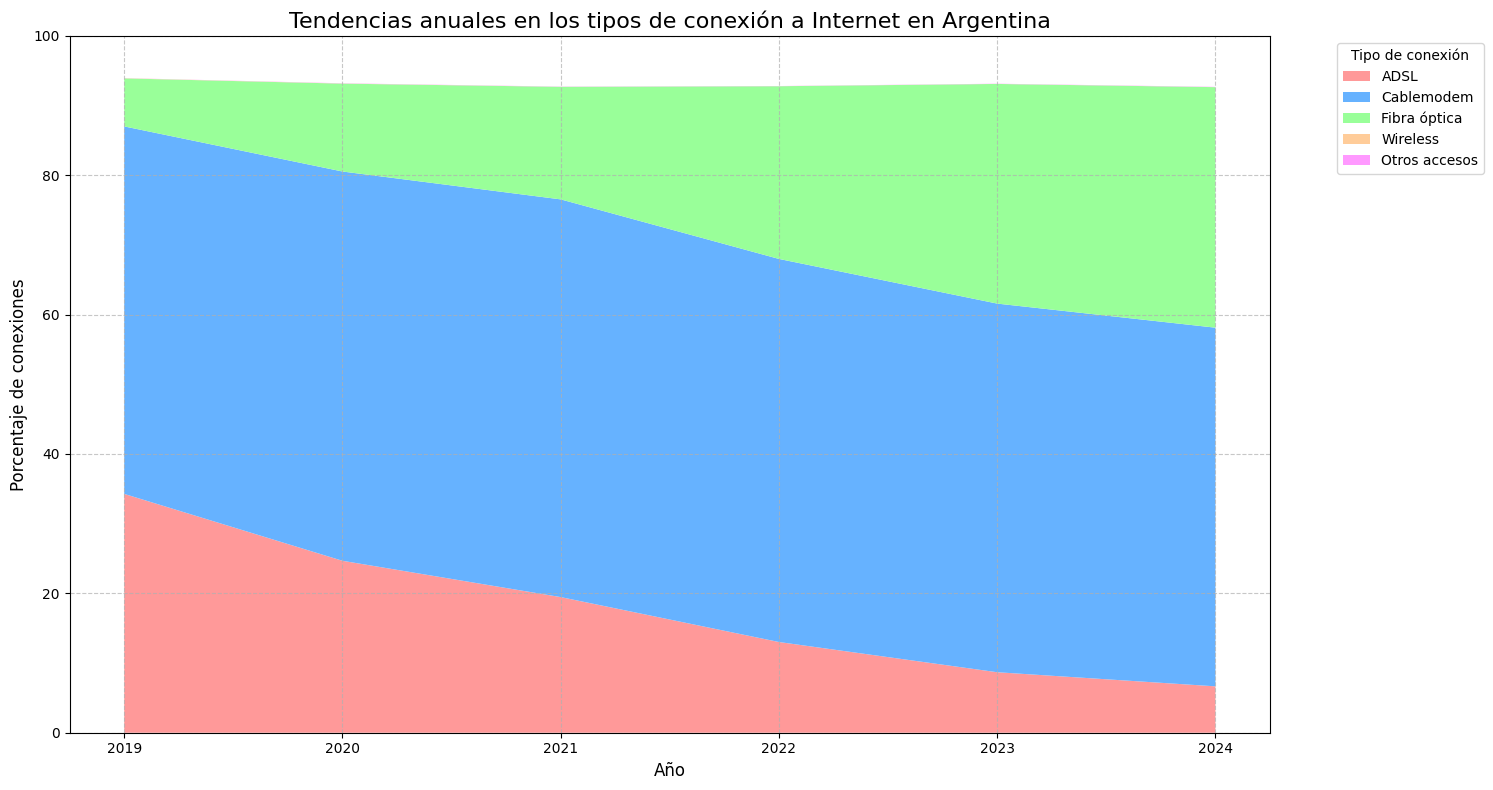

In [58]:
plt.figure(figsize=(15, 8))
plt.stackplot(df_anual['Año'], 
              [df_anual[f'{tipo}_porcentaje'] for tipo in tipos_conexion],
              labels=tipos_conexion,
              colors=[colores[tipo] for tipo in tipos_conexion])

plt.title('Tendencias anuales en los tipos de conexión a Internet en Argentina', fontsize=16)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Porcentaje de conexiones', fontsize=12)
plt.legend(title='Tipo de conexión', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(df_anual['Año'], rotation=0)  # Mostrar todos los años sin rotación
plt.ylim(0, 100)  # Asegurar que el eje y va de 0 a 100%
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(right=0.85)

plt.show()

Vemos que uno de los accesos más utilizados es el Cablemodem, si bien en los utlimos años ha ganado relevancia la Fibra Óptica, el Cablemodem sigue siendo de las opciones más elegidas.

Podemos observar tambien que otros tipos de accesos no son tan elegidos y que el ADSL va perdiendo consumidores año a año.



*Gráfico de evolución de fibra óptica por provincia*

In [97]:
#Calculamos el promedio de adopción de fibra óptica por provincia
df['Porcentaje Fibra'] = df['Fibra óptica'] / df['Total accesos'] * 100
promedio_fibra_por_provincia = df.groupby('Provincia')['Porcentaje Fibra'].mean()

In [98]:
#Seleccionamos las 5 provincias con mayor adopción de fibra óptica
top_5_provincias = promedio_fibra_por_provincia.nlargest(5).index

In [99]:
#Filtramos los datos para incluir solo las 5 provincias principales
df_top_10 = df[df['Provincia'].isin(top_5_provincias)]
df_pivot = df_top_10.pivot_table(values='Porcentaje Fibra', index='Año', columns='Provincia', aggfunc='mean')

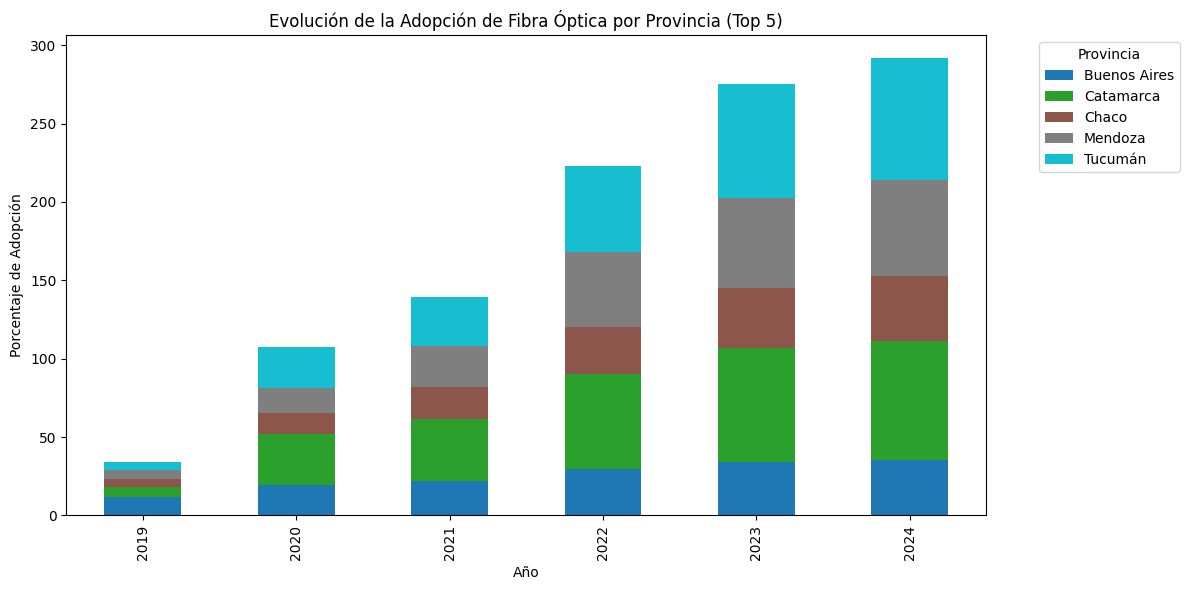

In [100]:
#Creamos el gráfico de barras apiladas
df_pivot.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab10')
plt.title('Evolución de la Adopción de Fibra Óptica por Provincia (Top 5)')
plt.xlabel('Año')
plt.ylabel('Porcentaje de Adopción')
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Vemos que Tucuman es la provincia que más ha adoptado la Fibra óptica como tipo de acceso a internet en los ultimos tres años, junto con Mendoza. A partir del 2020 ha comenzado a ser uno de los accesos mas elegidos por las provincias.

-----------------------------------------------------------------------------------------
# Análisis geográfico
-----------------------------------------------------------------------------------------

*Gráfico de barras*

**Comparación de accesos por provincia**

In [59]:
#Agrupamos por provincia y sumar el total de accesos
accesos_por_provincia = df.groupby('Provincia')['Total accesos'].sum().sort_values(ascending=False)

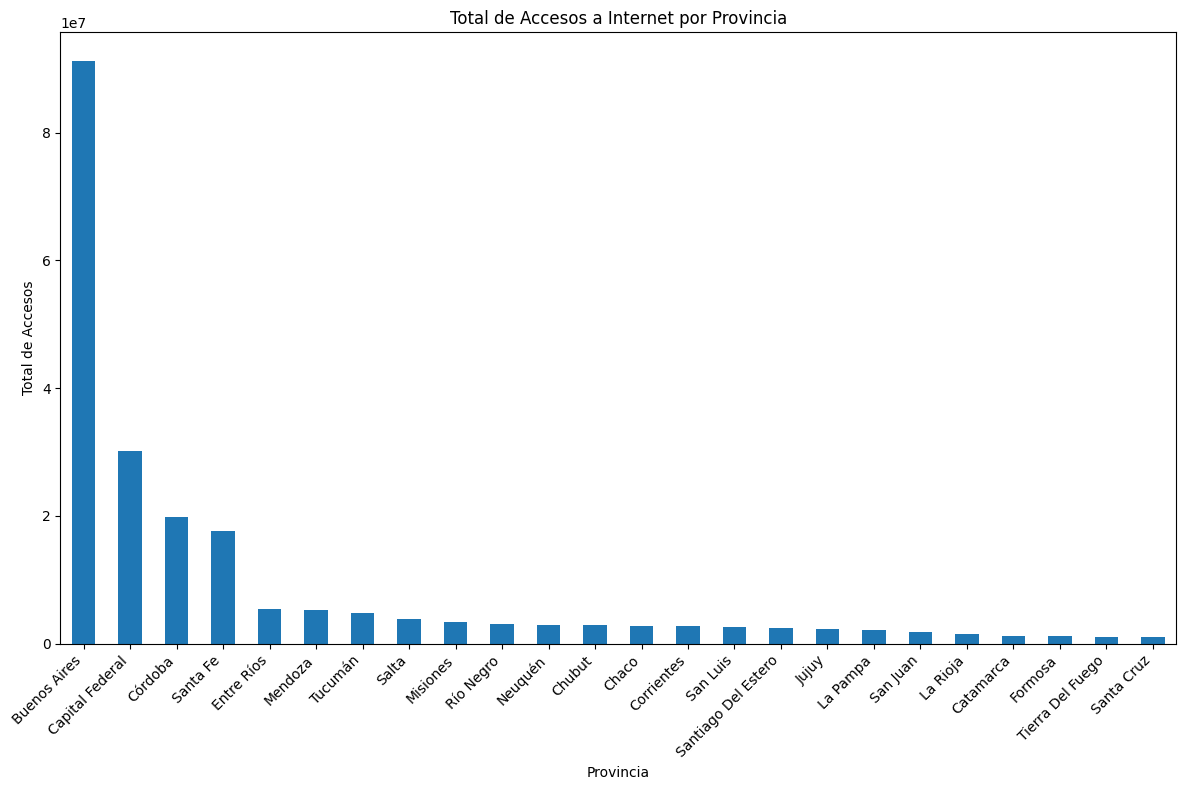

In [60]:
plt.figure(figsize=(12, 8))
accesos_por_provincia.plot(kind='bar')
plt.title('Total de Accesos a Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Total de Accesos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

El gráfico nos muestra que Buenos Aires es la provincia que cuenta con mas cantidad de accesos a internet. Supera ampliamente a las demas provincias, la cuales no llegan a tener mas de uno o dos accesos en comparación.

*Gráfico de barras*

**Penetración de internet por provincia**

In [66]:
#Calculamos el promedio de accesos a Internet por cada 100 hogares para cada provincia, 
#luego los ordenamos las provincias de mayor a menor según este promedio
penetracion_por_provincia = df.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False)

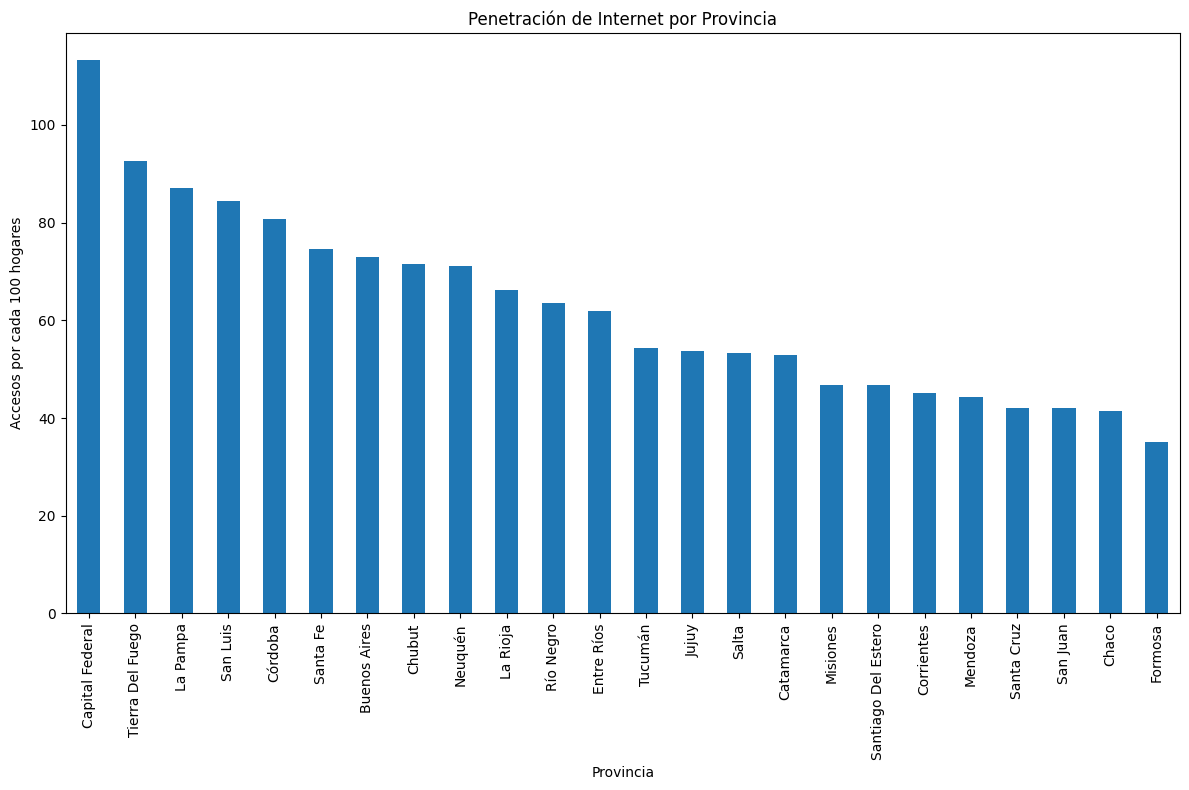

In [85]:
#Realizamos el gráfico
plt.figure(figsize=(12, 8))
penetracion_por_provincia.plot(kind='bar')
plt.title('Penetración de Internet por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Capital federal lleva la cabecera en acceso a internet por cada 100 hogares, siendo el lugar donde 113 hogares tienen acceso a internet. Sobresaliendo ampliamente por sobre el resto de las provincias. 

Este suceso se puede atribuir a que es la capital del país donde se concentra gran parte de la población.

*Gráfico de Violín*



In [84]:
#Vemos un resumen estadistico de penetración por provincia
penetracion_por_provincia.describe()

count     24.000000
mean      62.410060
std       19.555739
min       35.103810
25%       46.307143
50%       58.098333
75%       73.388929
max      113.203333
Name: Accesos por cada 100 hogares, dtype: float64

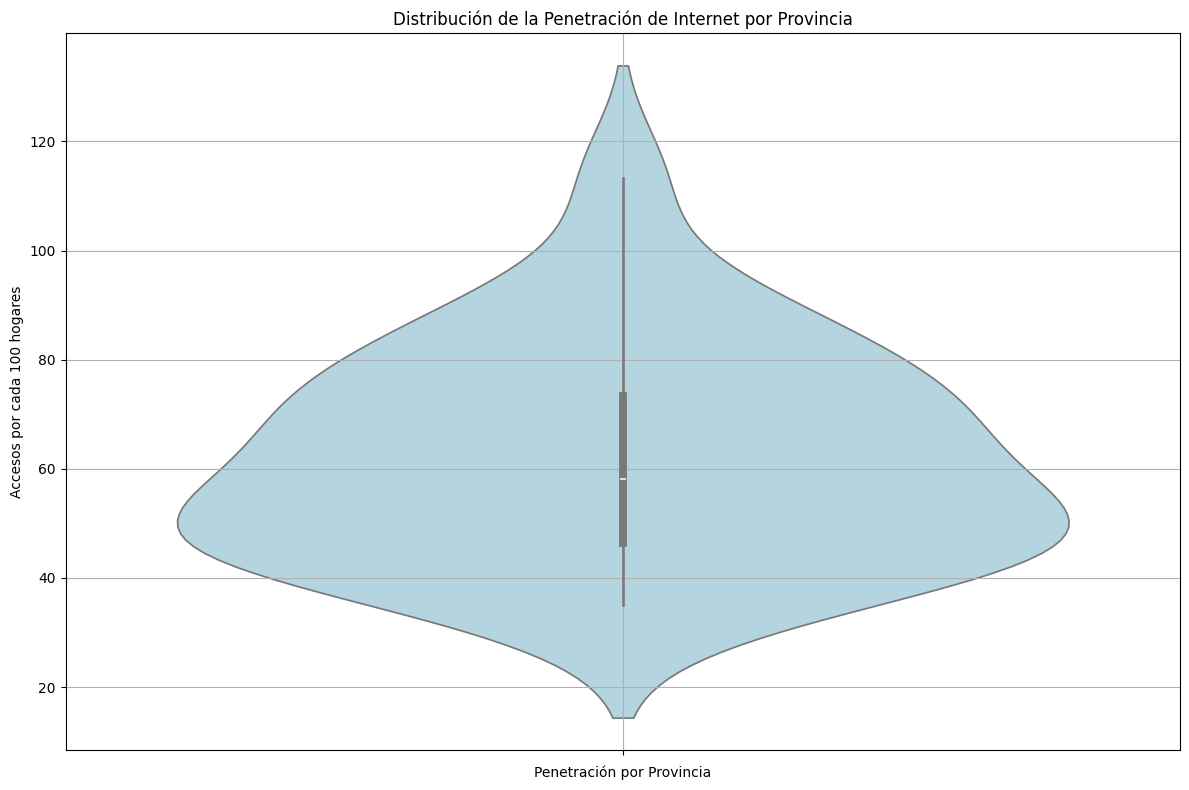

In [86]:
#Realizamos el gráfico de violín
plt.figure(figsize=(12, 8))
sns.violinplot(data=penetracion_por_provincia, inner="box", color='lightblue')
plt.title('Distribución de la Penetración de Internet por Provincia')
plt.xlabel('Penetración por Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.tight_layout()
plt.show()

El gráfico nos muestra que en promedio 62 de cada 100 hogares tienen acceso a internet.

En las provincias con menos penetracion son 35 de cada 100 hogares los que tienen acceso. Un ejemplo es la provincia de Formosa.

El 75% de las provincias tienen 73 o menos accesos por cada 100 hogares. Solo el 25% de las provincias tienen una penetración mayor, como Capital Federal, Tierra del Fuego y La pampa.
